In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data pre-processing

In [184]:
#importing the dataframe
df = pd.read_csv('spotify-2023.csv', sep = ',', header = 0 , encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [185]:
# Checking dataframe size
df.shape

(953, 24)

There are 24 features and 953 observations in this dataframe

**Handling missing values and data type**

In [186]:
#Cheking if there is any missing value
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

There are missing values in the 'in_shazam_charts' and the 'key' columns. 
- As the song might not never be appearing on the shazam chart, this will result in null values. To handle these missing values, we will fill in the missing data in 'in_shazam_charts' column with value '0'.
- As every song has a key, there can not be null values in the 'key' column. To handle these misisng values, we will fill in the missing data in 'key' column with value '-', since any random assign for 'key' might be wrong.


In [187]:
#Dropping missing values
df.fillna({'in_shazam_charts': 0, 'key': '-'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

There is no null value now

As the released_day feature is of no value, we will drop this column

In [188]:
#Dropping released_day column
df = df.drop('released_day', axis = 1)
df.shape

(953, 23)

In [189]:
#Checking variables type
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

As we can see, the "streams", "in_deezer_playlists and "in_shazam_charts" have the object dtype. For effective ranking and calculation, we will convert those dtype column to 'int' dtype

In [190]:
#convert object dtype to numeric dtype
df.loc[:,['streams','in_deezer_playlists','in_shazam_charts']] = df[['streams','in_deezer_playlists','in_shazam_charts']].apply(pd.to_numeric,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               952 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   874 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      946 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   953 non-null    object
 15  mode                  953 non-null    ob

As there are non-numeric values in the 'streams', 'in_deezer_playlists', and 'in_shazam_charts', those values were converted to null values. Firstly, we have to drop these null values. Next, we can convert object dtype to int dtype using 'astype' function

In [191]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            867 non-null    object
 1   artist(s)_name        867 non-null    object
 2   artist_count          867 non-null    int64 
 3   released_year         867 non-null    int64 
 4   released_month        867 non-null    int64 
 5   in_spotify_playlists  867 non-null    int64 
 6   in_spotify_charts     867 non-null    int64 
 7   streams               867 non-null    object
 8   in_apple_playlists    867 non-null    int64 
 9   in_apple_charts       867 non-null    int64 
 10  in_deezer_playlists   867 non-null    object
 11  in_deezer_charts      867 non-null    int64 
 12  in_shazam_charts      867 non-null    object
 13  bpm                   867 non-null    int64 
 14  key                   867 non-null    object
 15  mode                  867 non-null    object


The dataframe now has 867 observations

In [192]:
#Converting object dtype to int dtype
df = df.astype({"streams": int, "in_deezer_playlists": int, "in_shazam_charts": int}, errors = 'ignore')
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

**Summary of statistics**

In [193]:
df.describe()


,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,867.000000,867.000000,867.000000,867.000000,867.000000,8.670000e+02,867.00000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1.574394,2019.223760,6.152249,3371.915802,10.807382,4.058458e+08,54.33218,48.294118,109.200692,2.463668,46.572088,123.061130,67.261822,51.508651,64.131488,27.366782,1.606690,18.366782,10.326413
std,0.913051,10.570264,3.508798,4042.566785,18.111052,4.093741e+08,64.91117,48.666704,178.159888,5.643325,120.090364,28.194265,14.452341,23.462138,16.385970,25.695574,8.523902,13.915838,10.051750
min,1.000000,1930.000000,1.000000,31.000000,0.000000,2.762000e+03,0.00000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,817.500000,0.000000,1.352617e+08,12.00000,6.000000,12.000000,0.000000,0.000000,100.000000,58.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,1930.000000,2.000000,2.587147e+08,29.00000,32.000000,36.000000,0.000000,1.000000,121.000000,70.000000,52.000000,65.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4280.500000,15.000000,5.314238e+08,72.00000,81.000000,110.000000,2.000000,30.000000,142.000000,78.000000,70.000000,76.500000,43.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,29499.000000,147.000000,2.808097e+09,492.00000,275.000000,974.000000,46.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Visualization

**Histogram**

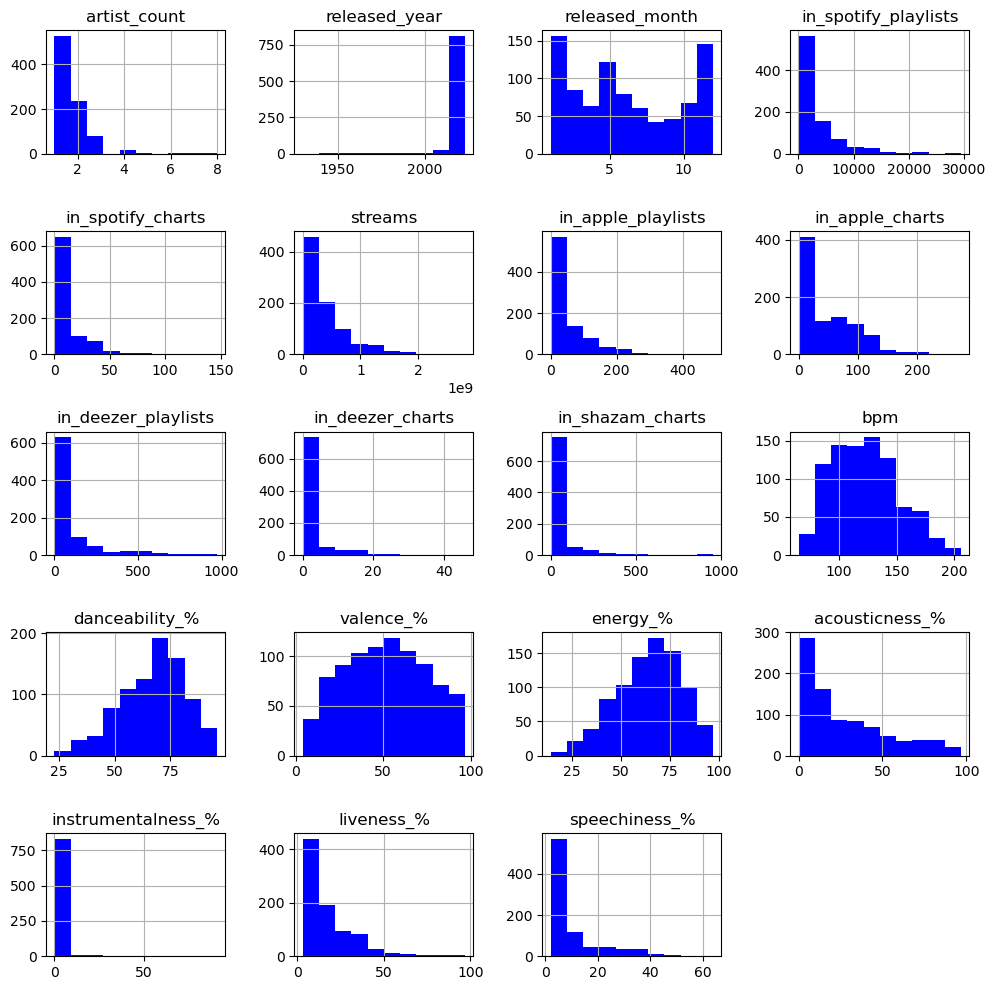

In [194]:
df.hist(figsize = (10,10), color = 'blue')
plt.tight_layout()

We can use a heatmap to explore patterns in audio features

**Correlation heatmap**

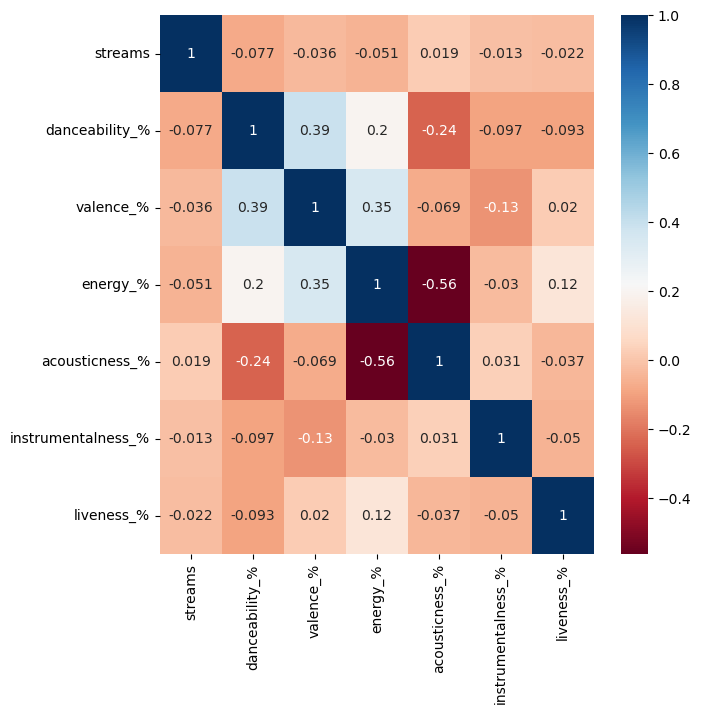

In [195]:
plt.figure(figsize = (7,7))
sns.heatmap(df[['streams','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%']].corr(), annot=True,cmap='RdBu')
plt.show()

According to the map, the percentage indicating how suitable the song is for dancing and the total number of streams have a relatively negative correlation. Meanwhile, the amount of acoustic sound in the song positively correlates with the total number of streams on Spotify. Other factors have little influence on the number of streams.

**Time series plot**

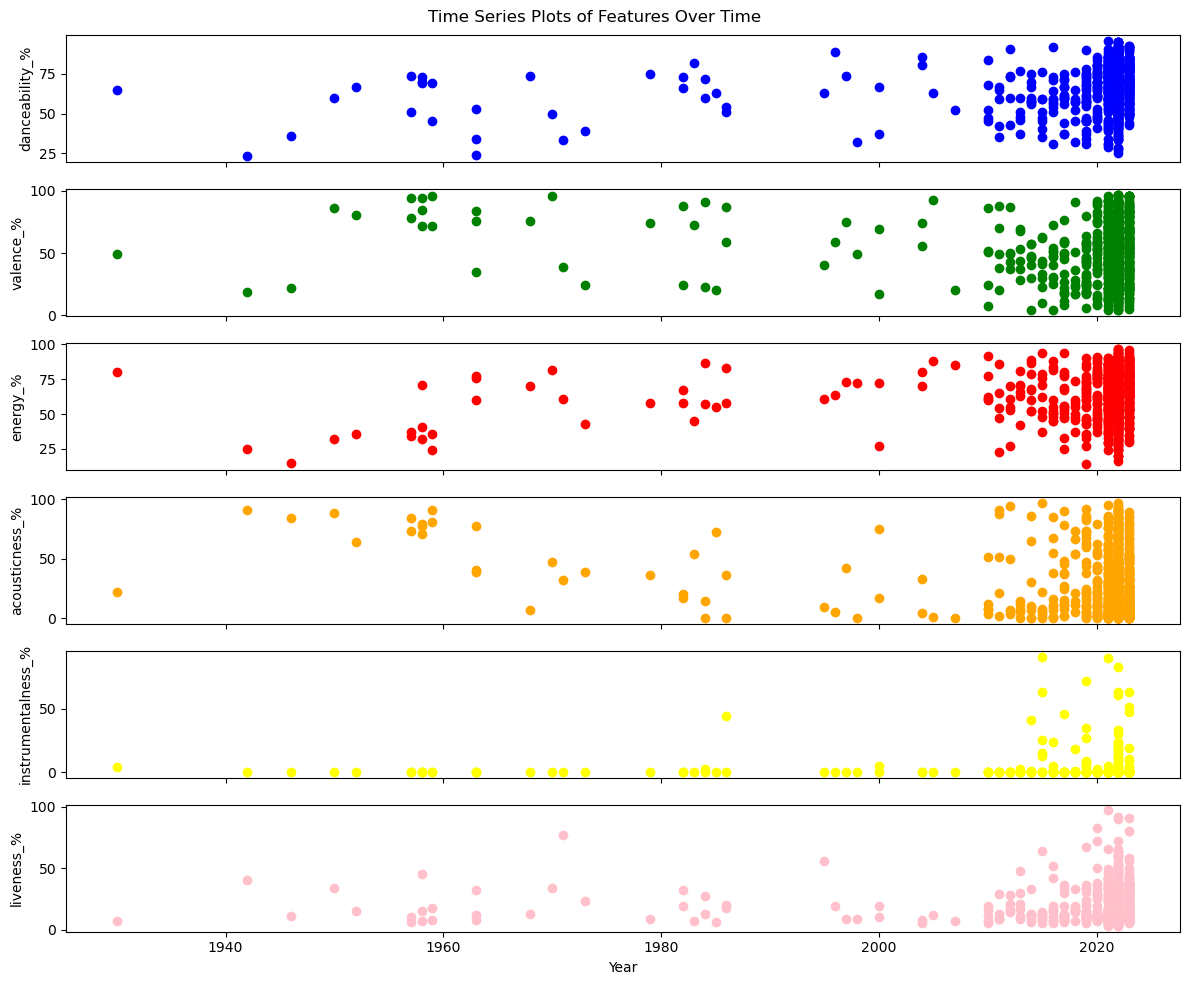

In [201]:
# Create subplots for each feature
fig, axs = plt.subplots(nrows=6, figsize=(12, 10), sharex=True)

# Plot 'danceability_%'
axs[0].scatter(df['released_year'], df['danceability_%'], label='danceability_%', color='blue')
axs[0].set_ylabel('danceability_%')

# Plot 'valence_%'
axs[1].scatter(df['released_year'], df['valence_%'], label='valence_%', color='green')
axs[1].set_ylabel('valence_%')

                  
# Plot 'energy_%'
axs[2].scatter(df['released_year'], df['energy_%'], label='energy_%', color='red')
axs[2].set_ylabel('energy_%')

# Plot 'acousticness_%'
axs[3].scatter(df['released_year'], df['acousticness_%'], label='acousticness_%', color='orange')
axs[3].set_ylabel('acousticness_%')


# Plot 'instrumentalness_%'
axs[4].scatter(df['released_year'], df['instrumentalness_%'], label='instrumentalness_%', color='yellow')
axs[4].set_ylabel('instrumentalness_%')

# Plot 'liveness_%
axs[5].scatter(df['released_year'], df['liveness_%'], label='liveness_%', color='pink')
axs[5].set_ylabel('liveness_%')
                

plt.xlabel('Year')
plt.suptitle('Time Series Plots of Features Over Time')
plt.tight_layout()
plt.show()